# Voice recognisition with an Algorithm.
---

For this assignment, I first tried to do the random trees visualisation Algorithm, but from what I could see, the package wouldn't install on my macbook.
Because of this, i've chosen for a different Algorithm; K nearest neighbor.

What K nearest neighbor does, it looks to it's nearest neighbor in its training space and function room. With this it can make a prediction of future numbers (can make a prediction).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans #The k-means algorithm
from sklearn.model_selection import train_test_split #We need this to split the data


from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split


## Pre processing steps

After that I've loaded in everything I need (numpy, matplotlib, pandas, seaborn etc.) let's see whats in the dataframe!

In [2]:
df = pd.read_csv('voice.csv')

df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


## Checking for missing values
---

Instead of using the "drop(0) fill NA" types that i did in the past, I know use the "df.isnull().sum()". For this I know can see afther this step there are no 0 values.

In [3]:
df.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [4]:
#info.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

## Label and turning them into 1's and 0's.
---

using the ".value_counts()" for looking how many values we have per gender. After that let's turn them into 1's and 0's!

In [5]:
df['label'].value_counts()

male      1584
female    1584
Name: label, dtype: int64

In [6]:
label_encoder = LabelEncoder()

df[['label']] = label_encoder.fit_transform(df['label'])

In [7]:
dict(enumerate(label_encoder.classes_))


{0: 'female', 1: 'male'}

We now have our column 'label' turned into 1's and 0's!

**male: 1**
**female: 0**

---

Now let's take another look at our dataframe

In [8]:
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1


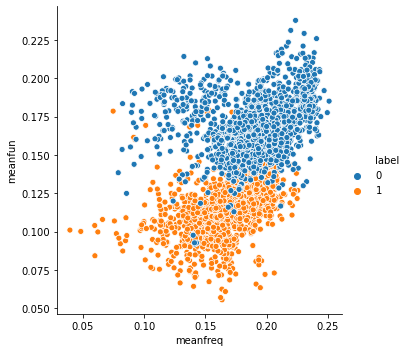

In [9]:
sns.relplot(x='meanfreq',y='meanfun',hue='label',kind='scatter',data=df)

This plot only purpoise was to see how the 'male' and 'female' labels are distributed in a plot (in meanfun). What I can see from this plot is that we have some outliers from both genders.

In [10]:
from sklearn.preprocessing import normalize

X = df.loc[:,'meanfreq': 'modindx'] #create the X matrix
X = normalize(X) #normalize the matrix to put everything on the same scale
y = df['label'] #create the y-variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) #split the data, store it into different variables

In [11]:
from sklearn.neighbors import KNeighborsClassifier #the object class we need

knn = KNeighborsClassifier(n_neighbors=5) #create a KNN-classifier with 5 neighbors (default)
knn = knn.fit(X_train, y_train) #this fits the k-nearest neigbor model with the train data
knn.score(X_test, y_test) #calculate the fit on the test data

0.8012618296529969

We can see that our prediction is 80% 'accurate', on a binary scale of only 'male' OR 'female' it's okay enough, but I don't think the K nearest neighbor was the best algorithm to check if it is a male or female voice, I coudn't get the random forest package to install on my macbook, otherwise I would've used that one.

---

## Ow no! It hurt's itself in confusion!

For now, let's go through with the data that we have!
Let's fit it into a confusion matrix (hence the pun). Let's see what of the predictions the algorithm got right, and what not.

In [12]:
from sklearn.metrics import confusion_matrix
y_test_pred = knn.predict(X_test) #the predicted values
cm = confusion_matrix(y_test, y_test_pred) #creates a "confusion matrix"
cm

array([[361,  96],
       [ 93, 401]])

In [13]:
#In order to read it easily , let's make a dataframe out of it, and add labels to it.
conf_matrix = pd.DataFrame(cm, index=['male', 'female'], columns = ['male_p', 'female_p']) 
conf_matrix

,male_p,female_p
male,361,96
female,93,401


## Confused! By matrix?

---

What we can see in this confusion matrix is that our system recognised 457 as male, and 494 as female.

From the 457, our algorithm detected that 361 are definitly male, and the rest (96) is female.

What is our recall and precision of the matrix?
**Let's find out!**

$recall$ = $361/361 + 96 = 0.79$

$precision$ = $361/361 + 93 = 0.80$

So, with a precision of 80%, (what also my k-nearest neighbor score predicted) can we use this model to make predictions?

Well, to be honest, a "one in five" chance of being wrong, I don't think so.
Maybe for a better result, it could be used with a different algorithm than K nearest neighbor.